In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
data = pd.read_json('ultimate_data_challenge.json')

In [3]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
# Convert signup_date and last_trip_date to datetime
data.signup_date = pd.to_datetime(data.signup_date)
data.last_trip_date = pd.to_datetime(data.last_trip_date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [6]:
# Look at duplicates
data[data.duplicated(keep = False)]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
116,Winterfell,1,2014-01-10,5.0,1.0,2014-01-11,Android,0.0,False,100.0,0.00,5.0
332,Astapor,1,2014-01-18,5.0,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0
2608,Astapor,1,2014-01-18,5.0,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0
3134,Astapor,1,2014-01-20,5.0,1.0,2014-01-20,iPhone,0.0,False,100.0,3.06,5.0
5958,Winterfell,1,2014-01-18,NaN,1.0,2014-01-19,Android,0.0,False,0.0,0.01,5.0
7836,Astapor,1,2014-01-11,5.0,1.0,2014-01-11,iPhone,0.0,True,0.0,2.33,5.0
10624,Winterfell,1,2014-01-18,5.0,1.0,2014-01-19,Android,0.0,False,0.0,3.54,5.0
14990,Winterfell,1,2014-01-18,NaN,1.0,2014-01-19,iPhone,0.0,True,0.0,1.44,5.0
18057,Astapor,1,2014-01-11,5.0,1.0,2014-01-11,iPhone,0.0,True,0.0,2.33,5.0
26709,Winterfell,1,2014-01-01,NaN,1.0,2014-01-02,Android,0.0,False,100.0,8.08,5.0


In [7]:
# Drop duplicates
data = data.drop_duplicates()

## Retention

Since we don't know when the data was pulled, we will use the lastest date found in signup_date to approximate.

In [8]:
last_date = max(data.last_trip_date)
start_date = last_date - timedelta(days = 30)

In [9]:
data['retention'] = np.where((data.last_trip_date >= start_date), 1, 0)

In [10]:
retention = data.groupby('retention').count()['city'].to_frame().reset_index()
retention.columns = ['retention', 'count']
retention.head()

,retention,count
0,0,31188
1,1,18804


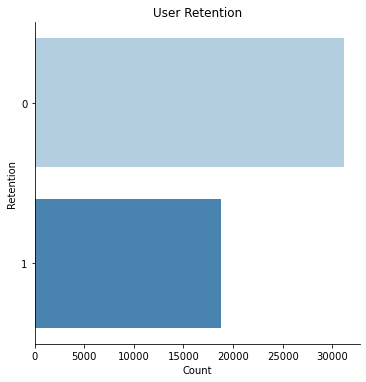

In [11]:
sns.catplot(data = retention, x = 'count', y = 'retention', kind = 'bar', orient = 'h', palette = 'Blues')
plt.xlabel('Count')
plt.ylabel('Retention')
plt.title('User Retention')
plt.show()

## City

In [12]:
city = data.groupby(['city', 'retention']).count()['signup_date'].to_frame().reset_index()
city.columns = ['city', 'retention', 'count']
city.head()

,city,retention,count
0,Astapor,0,12303
1,Astapor,1,4228
2,King's Landing,0,3767
3,King's Landing,1,6363
4,Winterfell,0,15118


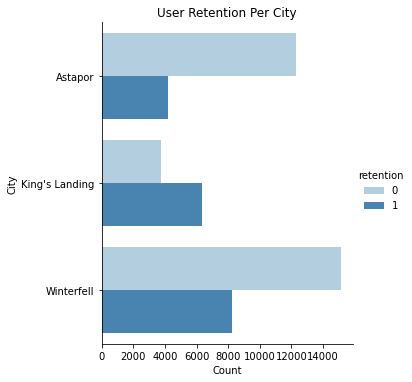

In [13]:
sns.catplot(data = city, x = 'count', y = 'city', hue = 'retention', kind = 'bar', orient = 'h', palette = 'Blues')
plt.xlabel('Count')
plt.ylabel('City')
plt.title('User Retention Per City')
plt.show()

In [14]:
# Perform dummy encoding
cities = pd.get_dummies(data.city)
data = data.join(cities).drop(columns = 'city')
data

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention,Astapor,King's Landing,Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1,0,1,0
49996,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0,1,0,0
49997,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0,0,0,1
49998,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0,1,0,0


## Trips in first 30 days

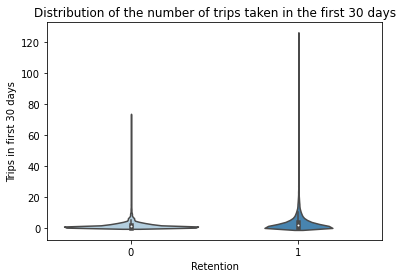

In [15]:
sns.violinplot(data = data, x = data.retention, y = data.trips_in_first_30_days, palette = 'Blues')
plt.xlabel('Retention')
plt.ylabel('Trips in first 30 days')
plt.title('Distribution of the number of trips taken in the first 30 days')
plt.show()

In [16]:
data.trips_in_first_30_days.describe()

count    49992.000000
mean         2.278405
std          3.792953
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64

## Signup Date & Last Trip Date

We will drop sign_up_date because these are all in January and are unlikely to be useful.  We will drop last_trip_date as this was used to determine retention which can cause multicollinearity in the model.

In [17]:
data = data.drop(columns = ['signup_date', 'last_trip_date'])

In [18]:
data.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention,Astapor,King's Landing,Winterfell
0,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1,0,1,0
1,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0,1,0,0
2,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0,1,0,0
3,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1,0,1,0
4,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0,0,0,1


## Avg rating of driver

In [19]:
data.avg_rating_of_driver.value_counts(dropna = False)

5.0    20766
NaN     8119
4.0     4193
4.5     2498
4.8     2430
4.7     1945
4.9     1771
4.3     1487
4.6     1143
3.0     1003
4.4      829
4.2      601
3.5      488
3.8      428
4.1      398
3.7      364
1.0      256
3.9      255
2.0      209
3.3      201
3.6      172
3.4      108
2.5       94
3.2       53
2.7       47
3.1       39
2.8       28
2.3       22
2.9       13
2.6       12
2.1        6
1.5        4
2.4        3
1.8        2
1.7        2
1.9        1
2.2        1
1.6        1
Name: avg_rating_of_driver, dtype: int64

In [20]:
data.avg_rating_of_driver.describe()

count    41873.000000
mean         4.601512
std          0.617360
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [21]:
# Fill na with average value
data.avg_rating_of_driver = data.avg_rating_of_driver.fillna(np.mean(data.avg_rating_of_driver))

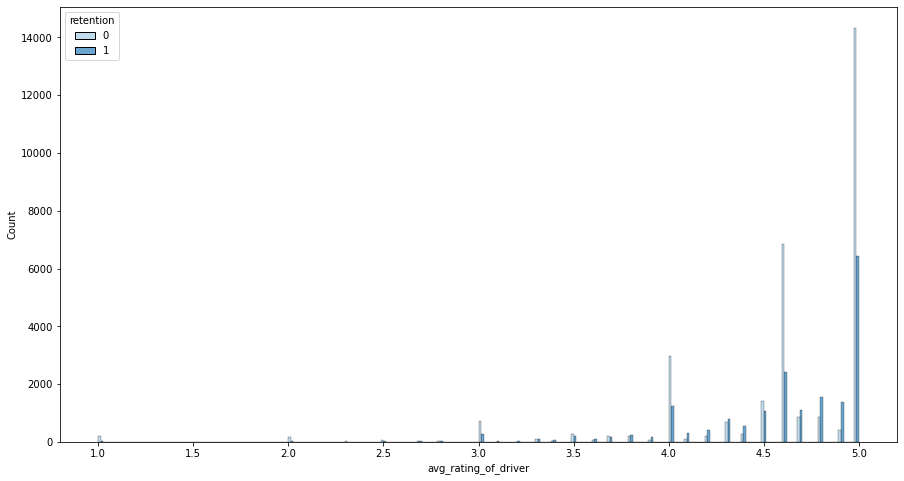

In [22]:
plt.figure(figsize=(15,8))
sns.histplot(data = data, x = 'avg_rating_of_driver', hue = 'retention', multiple = 'dodge', palette = 'Blues')
plt.show()

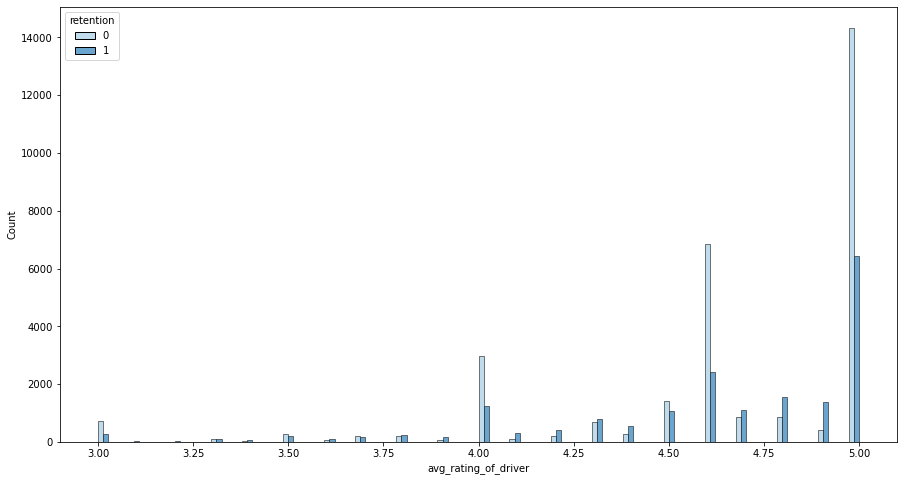

In [23]:
plt.figure(figsize=(15,8))
sns.histplot(data = data, x = 'avg_rating_of_driver', hue = 'retention', multiple = 'dodge', palette = 'Blues', binrange = [3, 5])
plt.show()

We can see that most drivers have average ratings of above 3.  Most users who rode with drivers with below 3 ratings were not retained.  This makes sense!

## Avg rating by driver

In [24]:
data.avg_rating_by_driver.value_counts(dropna = False)

5.0    28500
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
NaN      201
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
2.7        2
3.2        2
2.3        1
Name: avg_rating_by_driver, dtype: int64

In [25]:
data.avg_rating_by_driver.describe()

count    49791.000000
mean         4.778123
std          0.446679
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [26]:
# Fill na with average value
data.avg_rating_by_driver = data.avg_rating_by_driver.fillna(np.mean(data.avg_rating_by_driver))

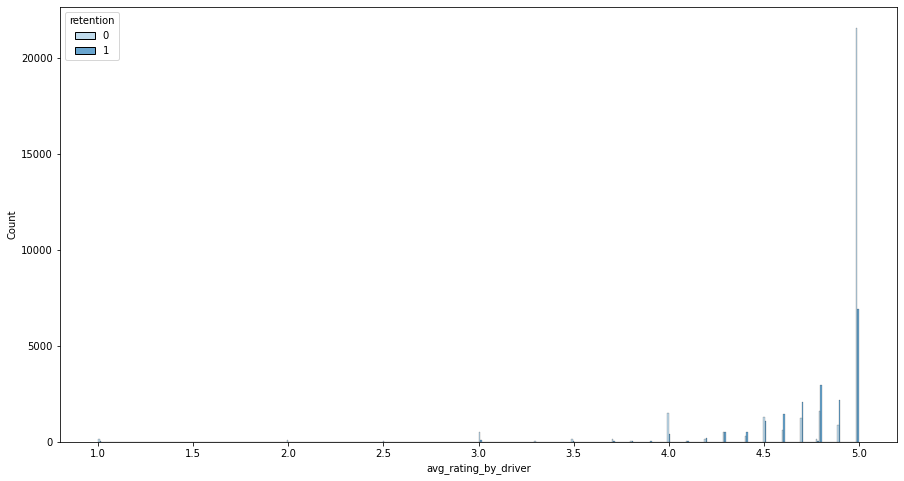

In [27]:
plt.figure(figsize=(15,8))
sns.histplot(data = data, x = 'avg_rating_by_driver', hue = 'retention', multiple = 'dodge', palette = 'Blues')
plt.show()

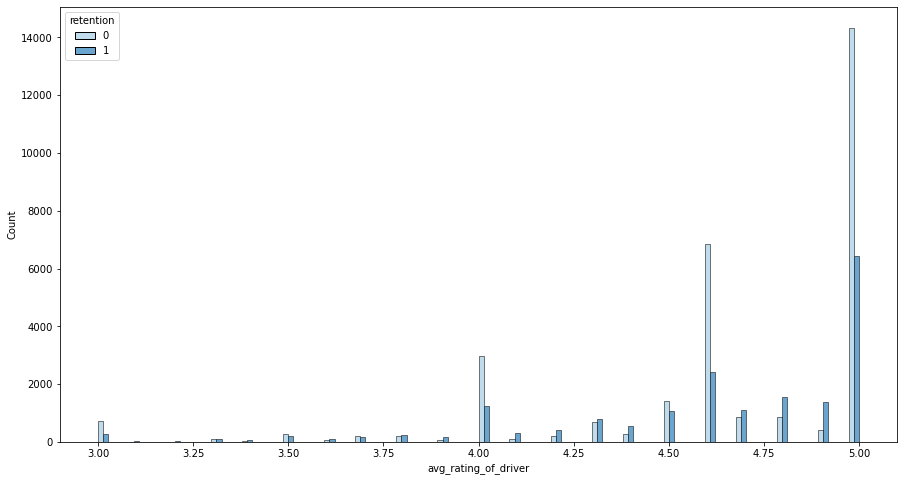

In [28]:
plt.figure(figsize=(15,8))
sns.histplot(data = data, x = 'avg_rating_of_driver', hue = 'retention', multiple = 'dodge', palette = 'Blues', binrange = [3,5])
plt.show()

## Average Surge

In [29]:
data.avg_surge.describe()

count    49992.000000
mean         1.074776
std          0.222352
min          1.000000
25%          1.000000
50%          1.000000
75%          1.050000
max          8.000000
Name: avg_surge, dtype: float64

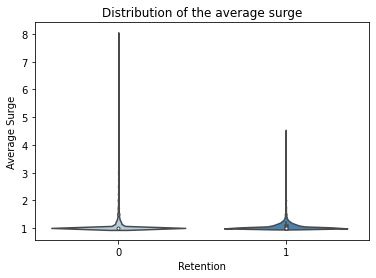

In [30]:
sns.violinplot(data = data, x = data.retention, y = data.avg_surge, palette = 'Blues')
plt.xlabel('Retention')
plt.ylabel('Average Surge')
plt.title('Distribution of the average surge')
plt.show()

Almost 75% of users received an average surge of 1%.  The average surge distributions have extremely long tails, there are a few users who experienced extremely large average surges.  We can see that the tail for retained users is shorter, suggesting that retained users experienced less average surge.

## Surge Percentage

In [31]:
data.surge_pct.describe()

count    49992.000000
mean         8.850952
std         19.960094
min          0.000000
25%          0.000000
50%          0.000000
75%          8.600000
max        100.000000
Name: surge_pct, dtype: float64

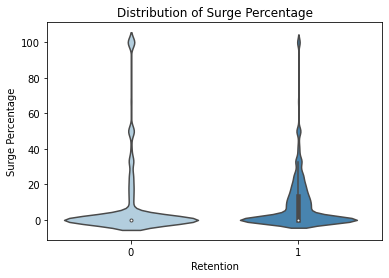

In [32]:
sns.violinplot(data = data, x = data.retention, y = data.surge_pct, palette = 'Blues')
plt.xlabel('Retention')
plt.ylabel('Surge Percentage')
plt.title('Distribution of Surge Percentage')
plt.show()

## Phone

In [33]:
data.phone.value_counts(dropna = False)

iPhone     34578
Android    15018
NaN          396
Name: phone, dtype: int64

In [34]:
data.phone = data.phone.fillna('Other')

In [35]:
phone = data.groupby(['phone', 'retention']).count()['trips_in_first_30_days'].to_frame().reset_index()
phone.columns = ['phone', 'retention', 'count']
phone.head()

,phone,retention,count
0,Android,0,11872
1,Android,1,3146
2,Other,0,263
3,Other,1,133
4,iPhone,0,19053


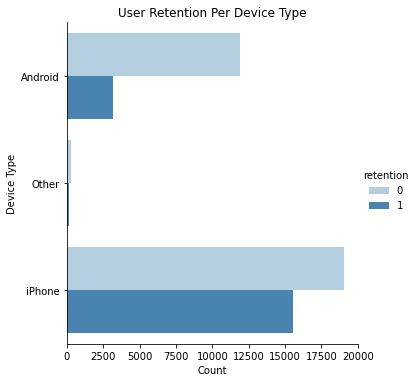

In [36]:
sns.catplot(data = phone, x = 'count', y = 'phone', hue = 'retention', kind = 'bar', orient = 'h', palette = 'Blues')
plt.xlabel('Count')
plt.ylabel('Device Type')
plt.title('User Retention Per Device Type')
plt.show()

There are generally alot more iPhone users on the app.  The retention rate for iPhone users also seem to be higher.

In [37]:
# Dummy encoding
phone = pd.get_dummies(data.phone)
data = data.join(phone).drop(columns = 'phone')

## Ultimate Black User

In [38]:
black = data.groupby(['ultimate_black_user', 'retention']).count()['trips_in_first_30_days'].to_frame().reset_index()
black.columns = ['ultimate_black_user', 'retention', 'count']
black.head()

,ultimate_black_user,retention,count
0,False,0,21834
1,False,1,9307
2,True,0,9354
3,True,1,9497


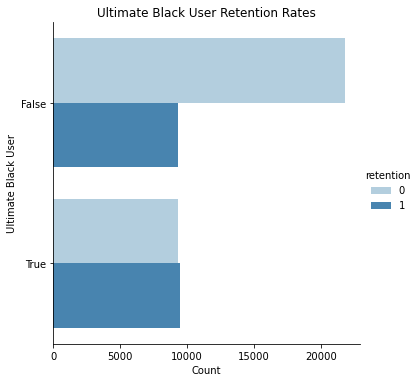

In [39]:
sns.catplot(data = black, x = 'count', y = 'ultimate_black_user', hue = 'retention', kind = 'bar', orient = 'h', palette = 'Blues')
plt.xlabel('Count')
plt.ylabel('Ultimate Black User')
plt.title('Ultimate Black User Retention Rates')
plt.show()

Most users are not ultimate black users.  Of those that are ultimate black users, over 50% are retained users. 

In [40]:
# Convert values to 0 and 1's
data['ultimate_black_user'] = data['ultimate_black_user'].astype(int)

## Weekday Percentage

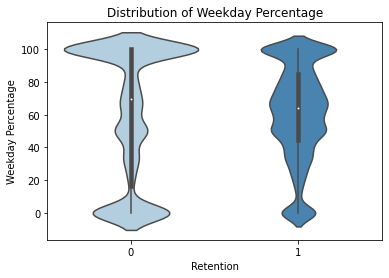

In [41]:
sns.violinplot(data = data, x = data.retention, y = data.weekday_pct, palette = 'Blues')
plt.xlabel('Retention')
plt.ylabel('Weekday Percentage')
plt.title('Distribution of Weekday Percentage')
plt.show()

## Average Distance

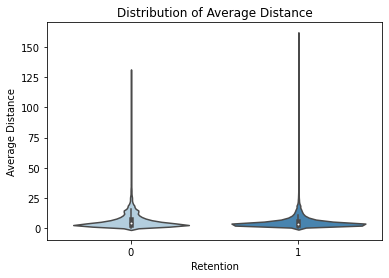

In [42]:
sns.violinplot(data = data, x = data.retention, y = data.avg_dist, palette = 'Blues')
plt.xlabel('Retention')
plt.ylabel('Average Distance')
plt.title('Distribution of Average Distance')
plt.show()

In [43]:
# Look at the cleaned dataset
data.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention,Astapor,King's Landing,Winterfell,Android,Other,iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,0,1,0,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1,0,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,0,1,0,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0,0


<AxesSubplot:>

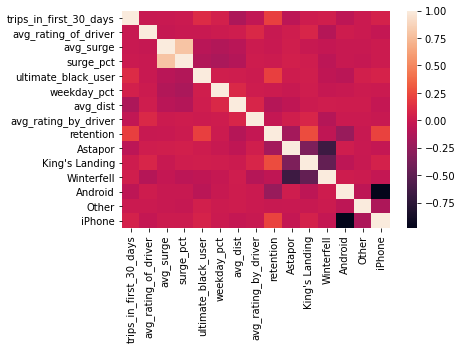

In [44]:
# Correlation map 
corr = data.corr()
sns.heatmap(corr)

# Model Building

In [45]:
X = data.drop(columns = 'retention')
y = data['retention']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

### Random Forest

In [47]:
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# use CV to tune number of trees
params = {'n_estimators': [10, 50, 100, 200],
          'max_features': ['auto', 'sqrt', 'log2'], 
          'max_depth' :  np.arange(4,50), 
          'criterion' :['gini', 'entropy'],
          'min_samples_split' : [2, 3, 4]}
model = RandomizedSearchCV(clf, params)
model.fit(X_train, y_train)
print('Best parameters were', model.best_params_)
print('Best average accuracy was', model.best_score_)

Best parameters were {'n_estimators': 200, 'min_samples_split': 3, 'max_features': 'sqrt', 'max_depth': 13, 'criterion': 'gini'}
Best average accuracy was 0.778047682555884


### Logistic Regression

In [48]:
LR = LogisticRegression(random_state=42, max_iter = 500)
# use CV to tune number of trees
params = {'C': np.arange(0.5, 5, 0.5), 
          'solver':  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
model = RandomizedSearchCV(LR, params)
model.fit(X_train, y_train)
print('Best parameters were', model.best_params_)
print('Best average accuracy was', model.best_score_)

Best parameters were {'solver': 'liblinear', 'C': 2.5}
Best average accuracy was 0.7191232152913202


In [49]:
# Fit best model
best_params = {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 17, 'criterion': 'entropy'}

bestModel = RandomForestClassifier(random_state=42, class_weight='balanced', **best_params)
bestModel.fit(X_train, y_train)
y_pred = bestModel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Classsification Report: ",'\n', classification_report(y_test, y_pred))

print("Confusion Matrix: ",'\n', cm)

Classsification Report:  
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      9386
           1       0.70      0.69      0.69      5612

    accuracy                           0.77     14998
   macro avg       0.76      0.75      0.76     14998
weighted avg       0.77      0.77      0.77     14998

Confusion Matrix:  
 [[7700 1686]
 [1747 3865]]


## Feature Importance

In [50]:
# take a look at feature importance
imp = pd.DataFrame({'Predictors':X.columns, 'feature_importance': bestModel.feature_importances_})
imp = imp.sort_values(by = 'feature_importance', ascending=False)
imp

,Predictors,feature_importance
6,avg_dist,0.243707
5,weekday_pct,0.134279
7,avg_rating_by_driver,0.121460
0,trips_in_first_30_days,0.090956
1,avg_rating_of_driver,0.085442
3,surge_pct,0.074930
2,avg_surge,0.073140
9,King's Landing,0.054879
4,ultimate_black_user,0.036120
11,Android,0.024425


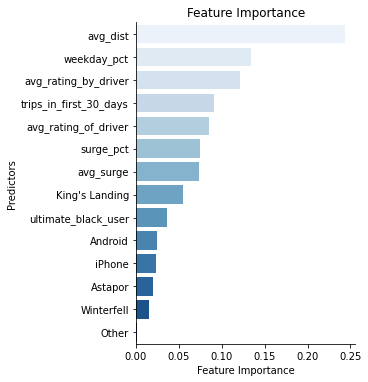

In [51]:
sns.catplot(data=imp, x = 'feature_importance', y = 'Predictors', kind = 'bar', orient = 'h', palette = 'Blues')
plt.xlabel('Feature Importance')
plt.ylabel('Predictors')
plt.title('Feature Importance')
plt.show()

## Recommendations

The most important feature is average distance, this explains 25% of the model.  Other important features are weekday percentage, average rating by driver, trips in the first 30 days and average rating of driver. 

In order to increase the average distance travelled, I would recommend implementing discounts based on distance e.g. 5% discount for users who book a trip that's longer than 50 miles.  Our model also shows that users with a higher weekday percentage are more likely to be a retained user.  I would recommend encouraging weekday bookings e.g. if a user rides more than 5 times during the week (between Monday & Friday), they earn a free ride.

Average rating by driver is also predictive of user retention.  I would recommend understanding how driver's rate, e.g. a survey can be sent out to drivers to understand their rating behaviour.  This information valuable as drivers tend to give higher ratings to retained users.

The number of trips in the first 30 days is also indicative of user retention.  In order to encourage more trips taken in the first 30 days, I would recommend implementing a rewards program that rewards users who ride alot in the first 30 days.

Finally, average rating of driver is also a good predictor.  I would recommend doing more research into how users tend to rate drivers.  With this information, Ultimate can take action to train their drivers based on what users value the most.  A quick survey can be sent out to users to collect this information.